<a href="https://colab.research.google.com/github/micah-shull/superstore/blob/main/000_superstore_dataprep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Preparation and Utility Script**

In this project, I developed a robust **data preparation workflow** and implemented it into a reusable utility script (`data_prep_utils.py`). The script automates key preprocessing steps, enabling consistency and efficiency across multiple notebooks.

#### **Key Data Preparation Steps**
1. **Data Cleaning**:
   - Converted date columns (`Order Date` and `Ship Date`) to datetime format for accurate time-based analysis.
   - Standardized categorical data by formatting values consistently (e.g., title case).

2. **Feature Engineering**:
   - Derived metrics like **Profit Margin**, **Shipping Time (Days)**, **Average Order Value (AOV)**, and **Regional Market Share** to enrich the dataset for more insightful analysis.

3. **Categorical Data Conversion**:
   - Automated the detection and conversion of columns with fewer than a specified number of unique values (default: 25) into categorical data types, improving memory efficiency and analysis readiness.
   - Added functionality to visualize and verify category counts for better transparency.

4. **Time-Based Features**:
   - Extracted additional time-based features such as **Order Month**, **Order Day**, **Order Weekday**, and their shipping counterparts to enable temporal analysis.

5. **Duplicate Removal**:
   - Implemented duplicate removal to ensure data integrity.

#### **Why Is This Work Important?**
1. **Improved Analysis**:
   - Derived metrics and consistent formatting provide a strong foundation for meaningful insights and visualizations.
   - Removing duplicates and converting appropriate columns to categorical types ensures clean and efficient data.

2. **Reproducibility**:
   - The utility script makes preprocessing steps consistent across notebooks, reducing manual errors and ensuring repeatable results.

3. **Scalability**:
   - The modular design of functions allows easy adaptation for new datasets or analysis requirements.

#### **Impact on Analysis**
1. **Focus on Insights**:
   - Automating tedious preprocessing tasks lets us focus on uncovering patterns, trends, and actionable insights in the data.
   
2. **Statistical and Visual Clarity**:
   - Standardized data ensures that statistical tests and visualizations reflect the true nature of the data without being skewed by inconsistencies or anomalies.

By creating this script, we’ve laid the groundwork for efficient, scientific, and scalable analysis in subsequent notebooks.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/sample-superstore.xls'
data = pd.read_excel(file_path)

print("Dataset loaded successfully!")
print("Missing Data: ", data.isnull().sum().sum())
# Display general info about the dataset
print("\nDataset Information:")
data.info()

Dataset loaded successfully!
Missing Data:  0

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Cate

## Derived Metrics: Enhancing Insights

To maximize the analytical potential of our dataset, we created a series of derived metrics. These metrics provide deeper insights into profitability, customer behavior, shipping efficiency, and regional performance. Below is a summary of the derived metrics we added:

1. **Profit Margin**:
   - **Formula**: `(Profit / Sales) * 100`
   - **Purpose**: Measures profitability as a percentage of sales, helping us identify high-margin products or categories.

2. **Shipping Time (Days)**:
   - **Formula**: `Ship Date - Order Date`
   - **Purpose**: Tracks the time it takes for orders to ship, allowing us to analyze shipping efficiency and identify potential delays.

3. **Estimated Cost**:
   - **Formula**: `Sales - Profit`
   - **Purpose**: Provides an approximation of the cost associated with each sale, which can be used for cost analysis and benchmarking.

4. **Profitability Ratio**:
   - **Formula**: `(Profit / Estimated Cost) * 100`
   - **Purpose**: Highlights the profitability relative to costs, offering insights into the financial performance of products and regions.

5. **Effective Price**:
   - **Formula**: `Sales * (1 - Discount)`
   - **Purpose**: Shows the actual revenue generated after applying discounts, useful for evaluating the impact of promotions on sales.

6. **Customer Metrics**:
   - **Components**:
     - Total Sales (`Sales_Customer`)
     - Total Profit (`Profit_Customer`)
     - Number of Orders (`Order Count`)
   - **Purpose**: Aggregates customer-level data to analyze customer lifetime value and purchasing patterns.

7. **Average Order Value (AOV)**:
   - **Formula**: `Total Sales / Number of Orders`
   - **Purpose**: Calculates the average revenue per order, offering insights into customer purchasing behavior.

8. **Regional Market Share**:
   - **Formula**: `(Regional Sales / Total Sales) * 100`
   - **Purpose**: Measures the percentage contribution of each region to overall sales, useful for identifying key markets.

9. **Profit per Category and Sub-Category**:
   - **Formula**: Aggregated profit by `Category` and `Sub-Category`
   - **Purpose**: Helps identify the most and least profitable categories and subcategories, guiding strategic decision-making.

---

### Why Derived Metrics Matter
These metrics transform raw data into actionable insights. For example:
- **Profit Margin** and **Profitability Ratio** reveal financial efficiency.
- **Shipping Time** identifies operational bottlenecks.
- **Customer Metrics** and **AOV** highlight customer value and purchasing behavior.
- **Regional Market Share** and **Profit by Category** guide strategic focus on high-performing areas.



In [ ]:
# Ensure the order and ship date columns are in datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Derived Metrics
# 1. Profit Margin
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

# 2. Shipping Time (Days)
data['Shipping Time (Days)'] = (data['Ship Date'] - data['Order Date']).dt.days

# 3. Estimated Cost and Profitability Ratio
data['Estimated Cost'] = data['Sales'] - data['Profit']
data['Profitability Ratio'] = (data['Profit'] / data['Estimated Cost']) * 100

# 4. Effective Price
data['Effective Price'] = data['Sales'] * (1 - data['Discount'])

# 5. Customer Metrics: Total Sales, Profit, and Order Count
customer_metrics = data.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique'  # Number of orders
}).rename(columns={'Order ID': 'Order Count'})

# Merge customer metrics back to the main dataset
data = data.merge(customer_metrics, on='Customer ID', suffixes=('', '_Customer'))

# 6. Average Order Value (AOV)
data['AOV'] = data['Sales_Customer'] / data['Order Count']

# 7. Regional Market Share
region_sales = data.groupby('Region')['Sales'].sum()
data['Regional Market Share (%)'] = (data['Region'].map(region_sales) / data['Sales'].sum()) * 100

# 8. Profit per Category and Sub-Category
category_profit = data.groupby('Category')['Profit'].sum()
subcategory_profit = data.groupby('Sub-Category')['Profit'].sum()

data['Profit per Category'] = data['Category'].map(category_profit)
data['Profit per Sub-Category'] = data['Sub-Category'].map(subcategory_profit)

# Convert Shipping Time to categorical
data['Shipping Time (Days)'] = data['Shipping Time (Days)'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Row ID                     9994 non-null   int64         
 1   Order ID                   9994 non-null   object        
 2   Order Date                 9994 non-null   datetime64[ns]
 3   Ship Date                  9994 non-null   datetime64[ns]
 4   Ship Mode                  9994 non-null   object        
 5   Customer ID                9994 non-null   object        
 6   Customer Name              9994 non-null   object        
 7   Segment                    9994 non-null   object        
 8   Country                    9994 non-null   object        
 9   City                       9994 non-null   object        
 10  State                      9994 non-null   object        
 11  Postal Code                9994 non-null   int64         
 12  Region

### Converting Columns to Categorical Data

To optimize the dataset and prepare for visualization, I identified columns with fewer than 25 unique values and converted them to the `category` data type. This process reduces memory usage and makes the data more efficient to handle, especially for categorical analyses.

#### Steps:
1. **Count Unique Values**: We calculated the number of unique values for each column using `.nunique()`.
2. **Set Threshold**: Columns with fewer than 25 unique values were identified as suitable for conversion.
3. **Conversion**: These columns were converted to the `category` data type using `.astype('category')`.

This preprocessing step ensures that categorical data is appropriately formatted for future analysis and visualizations.


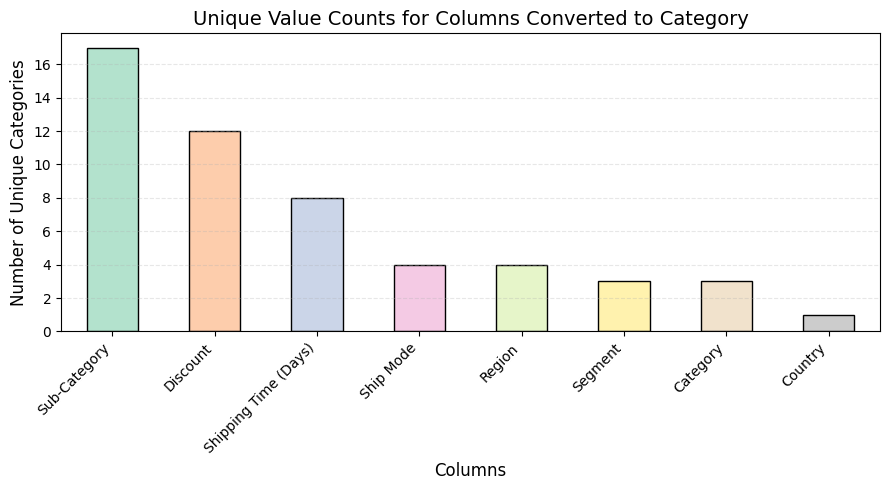


Columns converted to 'category' dtype:
Ship Mode: category
Segment: category
Country: category
Region: category
Category: category
Sub-Category: category
Discount: category
Shipping Time (Days): category


In [ ]:
# Count unique values for each column
unique_counts = data.nunique()

# Set the threshold for conversion to category
threshold = 25

# Identify columns to convert, excluding specific columns
columns_to_exclude = [
    'Profit per Category',
    'Profit per Sub-Category',
    'Regional Market Share (%)',
    'Quantity',
    'Order Count'
]

columns_to_convert = [
    col for col in unique_counts[unique_counts < threshold].index
    if col not in columns_to_exclude
]

# Convert selected columns to 'category' dtype
for column in columns_to_convert:
    data[column] = data[column].astype('category')

# Filter for columns with fewer than 25 unique values for visualization
filtered_counts = unique_counts[
    (unique_counts < threshold) & (~unique_counts.index.isin(columns_to_exclude))
]

# Define a color palette
palette = sns.color_palette("Pastel2", len(filtered_counts))

# Plot the barplot
plt.figure(figsize=(9, 5))
filtered_counts.sort_values(ascending=False).plot(
    kind='bar',
    color=palette,
    edgecolor='black'
)
plt.title('Unique Value Counts for Columns Converted to Category', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Unique Categories', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)  # Adjusted alpha for visibility
plt.tight_layout()
plt.show()

# Verify the conversions
print("\nColumns converted to 'category' dtype:")
for column in columns_to_convert:
    print(f"{column}: {data[column].dtype}")





### Extract and Convert Time-Based Features:

Extracting time-based features like month, day, and weekday from the order and ship dates will open up new possibilities for visualization and analysis. Here's how you can do it:

### Explanation:
1. **Datetime Conversion**: Ensures that `Order Date` and `Ship Date` are in datetime format using `pd.to_datetime()`.
2. **Extract Features**:
   - **Month**: Extracts the month as a number (e.g., January = 1).
   - **Day**: Extracts the day of the month.
   - **Weekday**: Extracts the name of the weekday (e.g., Monday, Tuesday).
3. **Convert to Categorical**: Converts the extracted features to the `category` data type for efficient storage and analysis.
4. **Verification**: Prints the data types of the new columns to confirm the conversion.



In [ ]:
# Ensure the order and ship date columns are in datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Create new time-based columns
data['Order Month'] = data['Order Date'].dt.month
data['Order Day'] = data['Order Date'].dt.day
data['Order Weekday'] = data['Order Date'].dt.day_name()  # e.g., 'Monday', 'Tuesday'

data['Ship Month'] = data['Ship Date'].dt.month
data['Ship Day'] = data['Ship Date'].dt.day
data['Ship Weekday'] = data['Ship Date'].dt.day_name()

# Convert the new columns to categorical
time_columns = ['Order Month', 'Order Day', 'Order Weekday', 'Ship Month', 'Ship Day', 'Ship Weekday']
for column in time_columns:
    data[column] = data[column].astype('category')

### Convert Categories to Title Case

1. **Selecting All Categorical Columns**: Using `data.select_dtypes(include='category').columns` to dynamically find columns with the `category` data type.
2. **Applying Title Case**: Iterating through each categorical column, converting the values to strings, applying `.str.title()` to capitalize each word, and then converting them back to the `category` data type.
3. **Verification**: Printing the unique values in each column to confirm the changes.

---

### Key Features:
- **Dynamic Selection**: Automatically applies to all current and future categorical columns, ensuring scalability.
- **Safe Conversion**: The check `if data[column].dtype.name == 'category'` ensures only columns with the `category` data type are processed.
- **Consistent Formatting**: Converts all text values in categorical columns to title case for consistent labeling.

---

### Example:
If `Region` initially had values like:
```python
['west', 'East', 'NORTH']
```
After running the code, it will be:
```python
['West', 'East', 'North']
```


In [ ]:
# Standardize all categorical columns
categorical_columns = data.select_dtypes(include='category').columns

# Apply title case or clean up each categorical column
for column in categorical_columns:
    if data[column].dtype.name == 'category':  # Ensure it's a category column
        # Convert to string and apply title case (if applicable)
        data[column] = data[column].astype(str).str.title().astype('category')

# Verify changes
print("Standardized Categorical Columns:")
for column in categorical_columns:
    print(f"{column}: {data[column].unique()}")


Standardized Categorical Columns:
Ship Mode: ['Second Class', 'Standard Class', 'First Class', 'Same Day']
Categories (4, object): ['First Class', 'Same Day', 'Second Class', 'Standard Class']
Segment: ['Consumer', 'Corporate', 'Home Office']
Categories (3, object): ['Consumer', 'Corporate', 'Home Office']
Country: ['United States']
Categories (1, object): ['United States']
Region: ['South', 'West', 'Central', 'East']
Categories (4, object): ['Central', 'East', 'South', 'West']
Category: ['Furniture', 'Office Supplies', 'Technology']
Categories (3, object): ['Furniture', 'Office Supplies', 'Technology']
Sub-Category: ['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage', ..., 'Envelopes', 'Fasteners', 'Supplies', 'Machines', 'Copiers']
Length: 17
Categories (17, object): ['Accessories', 'Appliances', 'Art', 'Binders', ..., 'Phones', 'Storage',
                          'Supplies', 'Tables']
Discount: ['0.0', '0.45', '0.2', '0.8', '0.3', ..., '0.6', '0.32', '0.1', '0.4', '0.15']
Length:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Row ID                     9994 non-null   int64         
 1   Order ID                   9994 non-null   object        
 2   Order Date                 9994 non-null   datetime64[ns]
 3   Ship Date                  9994 non-null   datetime64[ns]
 4   Ship Mode                  9994 non-null   category      
 5   Customer ID                9994 non-null   object        
 6   Customer Name              9994 non-null   object        
 7   Segment                    9994 non-null   category      
 8   Country                    9994 non-null   category      
 9   City                       9994 non-null   object        
 10  State                      9994 non-null   object        
 11  Postal Code                9994 non-null   int64         
 12  Region

In [ ]:
# Standardize categorical columns (e.g., Region, Category)
categorical_columns = ['Region', 'Category', 'Sub-Category']
for column in categorical_columns:
    data[column] = data[column].str.title()  # Convert to title case for consistency

# Remove duplicates
initial_shape = data.shape
data = data.drop_duplicates()
print(f"Removed {initial_shape[0] - data.shape[0]} duplicate rows.")

Removed 0 duplicate rows.


### Data Utils Script

In [ ]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(data):
    """
    Prepares and preprocesses the Superstore dataset by cleaning, deriving metrics,
    and converting appropriate columns to categorical types.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Derived Metrics
    # 1. Profit Margin
    data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

    # 2. Shipping Time (Days)
    data['Shipping Time (Days)'] = (data['Ship Date'] - data['Order Date']).dt.days

    # 3. Estimated Cost and Profitability Ratio
    data['Estimated Cost'] = data['Sales'] - data['Profit']
    data['Profitability Ratio'] = (data['Profit'] / data['Estimated Cost']) * 100

    # 4. Effective Price
    data['Effective Price'] = data['Sales'] * (1 - data['Discount'])

    # 5. Customer Metrics: Total Sales, Profit, and Order Count
    customer_metrics = data.groupby('Customer ID').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Order ID': 'nunique'  # Number of orders
    }).rename(columns={'Order ID': 'Order Count'})

    # Merge customer metrics back to the main dataset
    data = data.merge(customer_metrics, on='Customer ID', suffixes=('', '_Customer'))

    # 6. Average Order Value (AOV)
    data['AOV'] = data['Sales_Customer'] / data['Order Count']

    # 7. Regional Market Share
    region_sales = data.groupby('Region')['Sales'].sum()
    data['Regional Market Share (%)'] = (data['Region'].map(region_sales) / data['Sales'].sum()) * 100

    # 8. Profit per Category and Sub-Category
    category_profit = data.groupby('Category')['Profit'].sum()
    subcategory_profit = data.groupby('Sub-Category')['Profit'].sum()

    data['Profit per Category'] = data['Category'].map(category_profit)
    data['Profit per Sub-Category'] = data['Sub-Category'].map(subcategory_profit)

    # Convert Shipping Time to categorical
    data['Shipping Time (Days)'] = data['Shipping Time (Days)'].astype('category')

    # Exclude certain columns from category conversion
    columns_to_exclude = [
        'Profit per Category',
        'Profit per Sub-Category',
        'Regional Market Share (%)',
        'Quantity',
        'Order Count'
    ]

    # Convert columns with fewer than 25 unique values to category, except excluded ones
    unique_counts = data.nunique()
    threshold = 25
    columns_to_convert = [
        col for col in unique_counts[unique_counts < threshold].index
        if col not in columns_to_exclude
    ]
    for column in columns_to_convert:
        data[column] = data[column].astype('category')

    # Standardize categorical columns
    categorical_columns = data.select_dtypes(include='category').columns
    for column in categorical_columns:
        data[column] = data[column].astype(str).str.title().astype('category')

    return data


def convert_to_category_and_visualize(data, threshold=25, exclude_columns=None):
    """
    Converts columns with fewer than 'threshold' unique values to 'category' dtype,
    excluding specified columns, and visualizes the unique value counts.
    """
    if exclude_columns is None:
        exclude_columns = []

    # Count unique values for each column
    unique_counts = data.nunique()

    # Identify columns to convert, excluding specified columns
    columns_to_convert = [
        col for col in unique_counts[unique_counts < threshold].index
        if col not in exclude_columns
    ]

    # Convert selected columns to 'category' dtype
    for column in columns_to_convert:
        data[column] = data[column].astype('category')

    # Filter for columns with fewer than threshold unique values for visualization
    filtered_counts = unique_counts[
        (unique_counts < threshold) & (~unique_counts.index.isin(exclude_columns))
    ]

    # Visualize unique value counts
    palette = sns.color_palette("Pastel2", len(filtered_counts))
    plt.figure(figsize=(9, 5))
    filtered_counts.sort_values(ascending=False).plot(
        kind='bar',
        color=palette,
        edgecolor='black'
    )
    plt.title('Unique Value Counts for Columns Converted to Category', fontsize=14)
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Number of Unique Categories', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Verify the conversions
    # print("\nColumns converted to 'category' dtype:")
    # for column in columns_to_convert:
    #     print(f"{column}: {data[column].dtype}")

    return data

def add_time_based_columns(data):
    """
    Adds time-based columns derived from Order Date and Ship Date to the dataset,
    and converts these columns to categorical type for analysis and visualization.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Create new time-based columns
    data['Order Month'] = data['Order Date'].dt.month
    data['Order Day'] = data['Order Date'].dt.day
    data['Order Weekday'] = data['Order Date'].dt.day_name()  # e.g., 'Monday', 'Tuesday'

    data['Ship Month'] = data['Ship Date'].dt.month
    data['Ship Day'] = data['Ship Date'].dt.day
    data['Ship Weekday'] = data['Ship Date'].dt.day_name()

    # Convert the new columns to categorical
    time_columns = ['Order Month', 'Order Day', 'Order Weekday', 'Ship Month', 'Ship Day', 'Ship Weekday']
    for column in time_columns:
        data[column] = data[column].astype('category')

    return data

def standardize_categorical_columns(data):
    """
    Standardizes all categorical columns by converting their values to title case.
    Ensures consistent formatting across categorical data.
    """
    # Select all categorical columns
    categorical_columns = data.select_dtypes(include='category').columns

    # Apply title case to each categorical column
    for column in categorical_columns:
        if data[column].dtype.name == 'category':  # Ensure it's a category column
            # Convert to string, apply title case, and convert back to category
            data[column] = data[column].astype(str).str.title().astype('category')

    # Verify changes
    print("Standardized Categorical Columns:")
    for column in categorical_columns:
        print(f"{column}: {data[column].unique()}")

    return data

def standardize_selected_categorical_columns(data, columns):
    """
    Standardizes specific categorical columns by converting their values to title case.
    """
    for column in columns:
        if column in data.columns:
            data[column] = data[column].str.title()  # Convert to title case for consistency
    return data

def remove_duplicates(data):
    """
    Removes duplicate rows from the dataset and reports the number of rows removed.
    """
    initial_shape = data.shape
    data = data.drop_duplicates()
    print(f"Removed {initial_shape[0] - data.shape[0]} duplicate rows.")
    return data

'''

with open("data_prep_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_prep_utils.py")

# Import and reload the module to use its functions
import importlib
import data_prep_utils as dpu
importlib.reload(dpu)



Script successfully written to data_prep_utils.py


<module 'data_prep_utils' from '/content/data_prep_utils.py'>

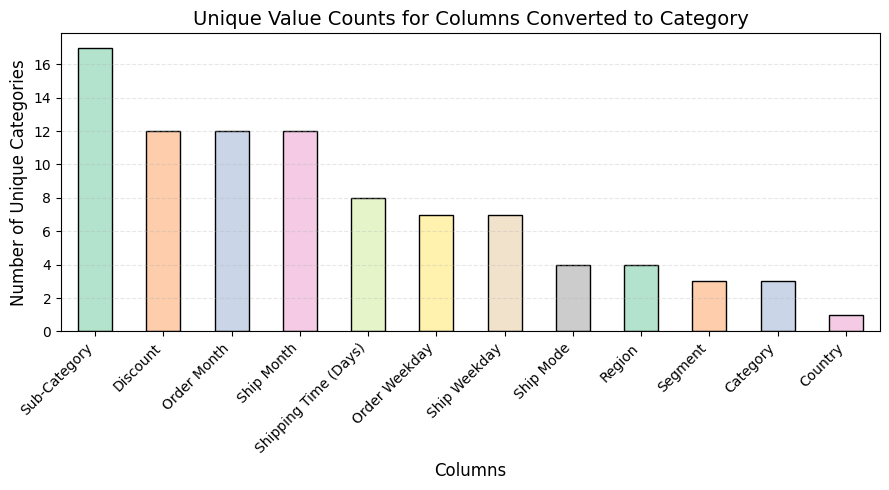

Removed 0 duplicate rows.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Row ID                     9994 non-null   int64         
 1   Order ID                   9994 non-null   object        
 2   Order Date                 9994 non-null   datetime64[ns]
 3   Ship Date                  9994 non-null   datetime64[ns]
 4   Ship Mode                  9994 non-null   category      
 5   Customer ID                9994 non-null   object        
 6   Customer Name              9994 non-null   object        
 7   Segment                    9994 non-null   category      
 8   Country                    9994 non-null   category      
 9   City                       9994 non-null   object        
 10  State                      9994 non-null   object        
 11  Postal Code                9994 non-null   

In [ ]:
# Import the script
import importlib
import data_prep_utils as dpu
importlib.reload(dpu)

# Load your dataset
data = pd.read_excel('sample-superstore.xls')

# Step 1: Preprocess the data (derives metrics and standardizes categorical columns)
data = dpu.preprocess_data(data)

# Step 2: Add time-based columns
data = dpu.add_time_based_columns(data)

# Step 3: Convert appropriate columns to category and visualize
exclude_columns = ['Profit per Category', 'Profit per Sub-Category', 'Regional Market Share (%)', 'Quantity', 'Order Count']
data = dpu.convert_to_category_and_visualize(data, threshold=25, exclude_columns=exclude_columns)

# Step 4: Remove duplicates
data = dpu.remove_duplicates(data)

# Step 5: (Optional) Standardize specific columns if needed
columns_to_standardize = ['Region', 'Category', 'Sub-Category']
data = dpu.standardize_selected_categorical_columns(data, columns_to_standardize)

# Final check
print(data.info())



### Strengths of the Data
1. **Complete Dataset**:
   - All 39 columns have the full 9994 non-null entries, indicating no missing data.

2. **Appropriate Data Types**:
   - **Datetime Columns**: `Order Date` and `Ship Date` are properly converted to `datetime64[ns]`, which allows for time-based analyses.
   - **Categorical Columns**: Key categorical features like `Ship Mode`, `Segment`, and `Order Weekday` are in the `category` type, optimizing memory and enabling category-specific operations.
   - **Numeric Columns**: Continuous data such as `Sales`, `Profit`, and derived metrics (`Profitability Ratio`, `AOV`, etc.) remain as `float64`.

3. **Derived Metrics**:
   - Metrics like `Profit Margin`, `Profitability Ratio`, and `Effective Price` provide deeper analytical potential.
   - Aggregated metrics (`Sales_Customer`, `Profit_Customer`) add customer-level insights.

4. **Time-Based Features**:
   - Columns like `Order Month`, `Order Weekday`, and `Ship Weekday` are included, enabling trend analyses by time.

5. **Exclusions Applied Correctly**:
   - Columns like `Profit per Category` and `Regional Market Share (%)` remain as `float64`, ensuring they’re not mistakenly treated as categorical.

